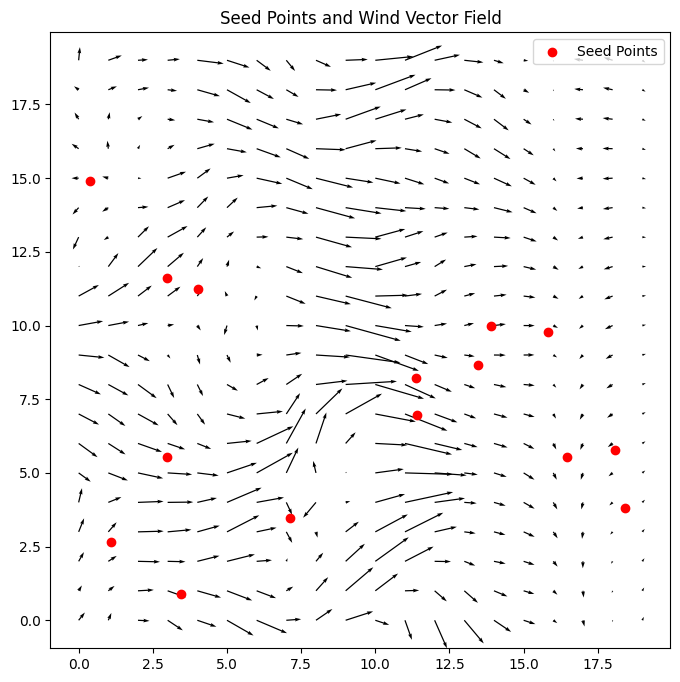

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_seeds = 15
seed_points = np.column_stack((np.random.uniform(0, 19, num_seeds), np.random.uniform(0, 19, num_seeds)))

vecs = np.reshape(np.fromfile("wind_vectors.raw"), (20, 20, 2))
vecs = vecs.transpose(1, 0, 2)
xx, yy = np.meshgrid(np.arange(0, 20), np.arange(0, 20))

plt.figure(figsize=(8, 8))
plt.quiver(xx, yy, vecs[:, :, 0], vecs[:, :, 1], color="black", width=0.002)
plt.scatter(seed_points[:, 0], seed_points[:, 1], color="red", label="Seed Points")
plt.legend()
plt.title("Seed Points and Wind Vector Field")
plt.show()


# **Euler's Method**

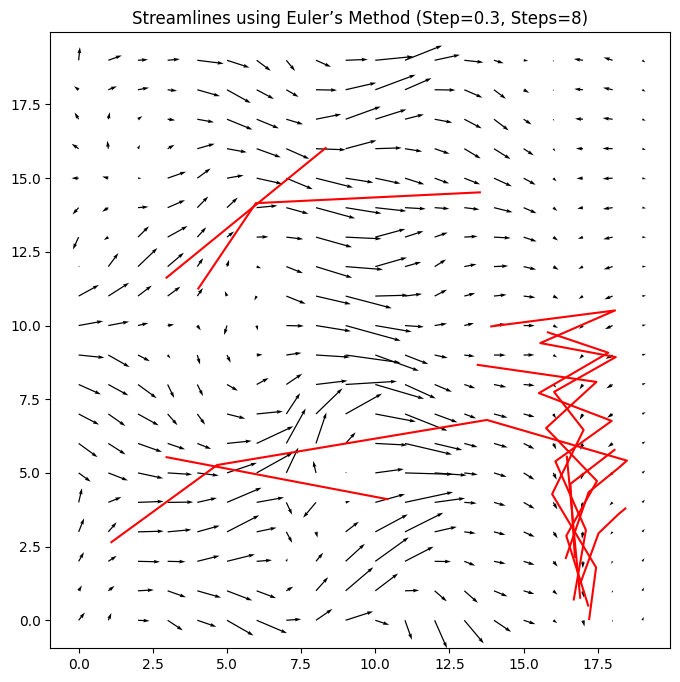

In [ ]:
def bilinear_interpolation(x, y, vecs):
    x0, y0 = int(x), int(y)
    x1, y1 = min(x0 + 1, 19), min(y0 + 1, 19)

    dx, dy = x - x0, y - y0

    v00 = vecs[y0, x0]
    v10 = vecs[y0, x1]
    v01 = vecs[y1, x0]
    v11 = vecs[y1, x1]

    interp_vec = (v00 * (1 - dx) * (1 - dy) +
                  v10 * dx * (1 - dy) +
                  v01 * (1 - dx) * dy +
                  v11 * dx * dy)
    return interp_vec

def trace_streamline(seed, step_size, num_steps, vecs):
    path = [seed]
    x, y = seed

    for _ in range(num_steps):
        v = bilinear_interpolation(x, y, vecs)
        x, y = x + step_size * v[0], y + step_size * v[1]

        if x < 0 or x > 19 or y < 0 or y > 19:
            break
        path.append((x, y))
    return np.array(path)

step_size = 0.3
num_steps = 8

plt.figure(figsize=(8, 8))
plt.quiver(xx, yy, vecs[:, :, 0], vecs[:, :, 1], color="black", width=0.002)
for seed in seed_points:
    streamline = trace_streamline(seed, step_size, num_steps, vecs)
    plt.plot(streamline[:, 0], streamline[:, 1], color="red")

plt.title("Streamlines using Euler’s Method (Step=0.3, Steps=8)")
plt.show()


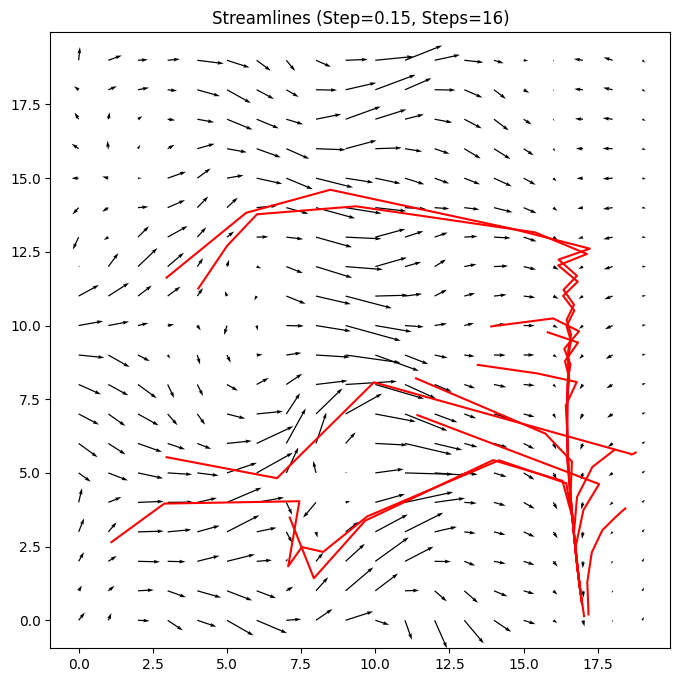

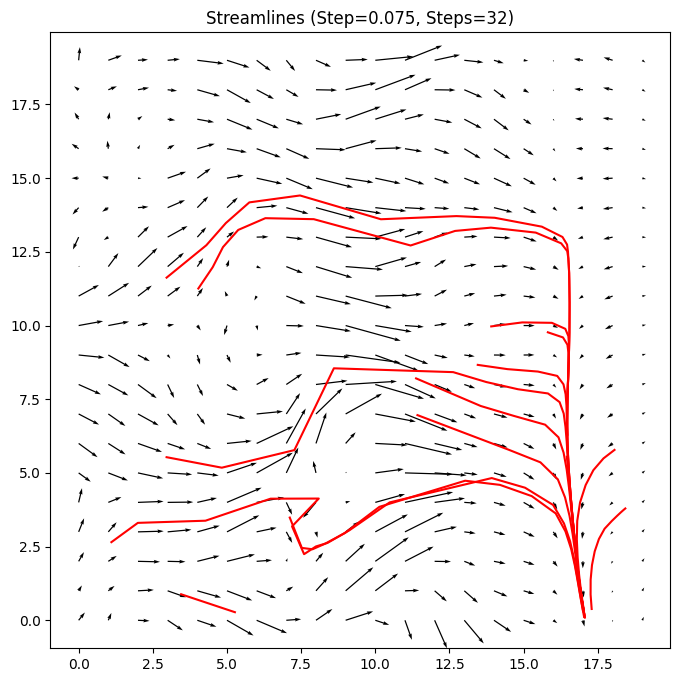

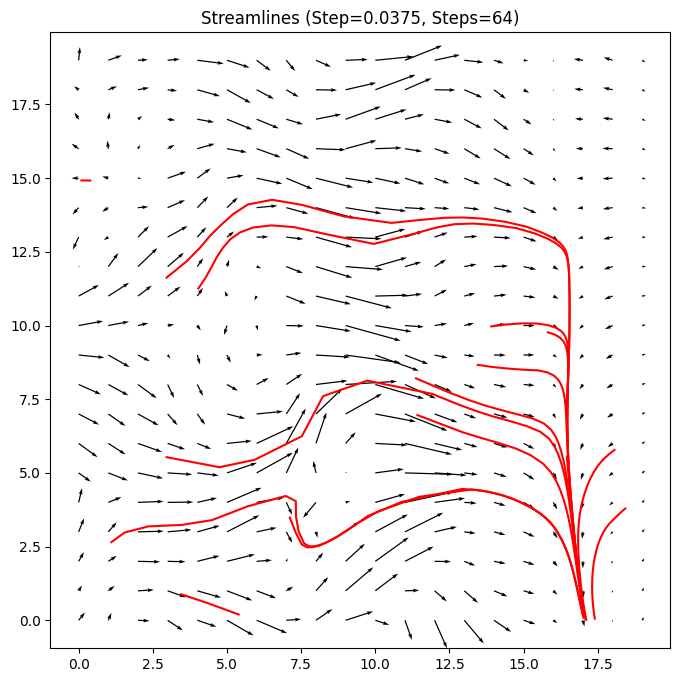

In [ ]:
step_sizes = [0.15, 0.075, 0.0375]
num_steps_list = [16, 32, 64]

for step_size, num_steps in zip(step_sizes, num_steps_list):
    plt.figure(figsize=(8, 8))
    plt.quiver(xx, yy, vecs[:, :, 0], vecs[:, :, 1], color="black", width=0.002)

    for seed in seed_points:
        streamline = trace_streamline(seed, step_size, num_steps, vecs)
        plt.plot(streamline[:, 0], streamline[:, 1], color="red")

    plt.title(f"Streamlines (Step={step_size}, Steps={num_steps})")
    plt.show()


# **Runge Kutta 4 Method**

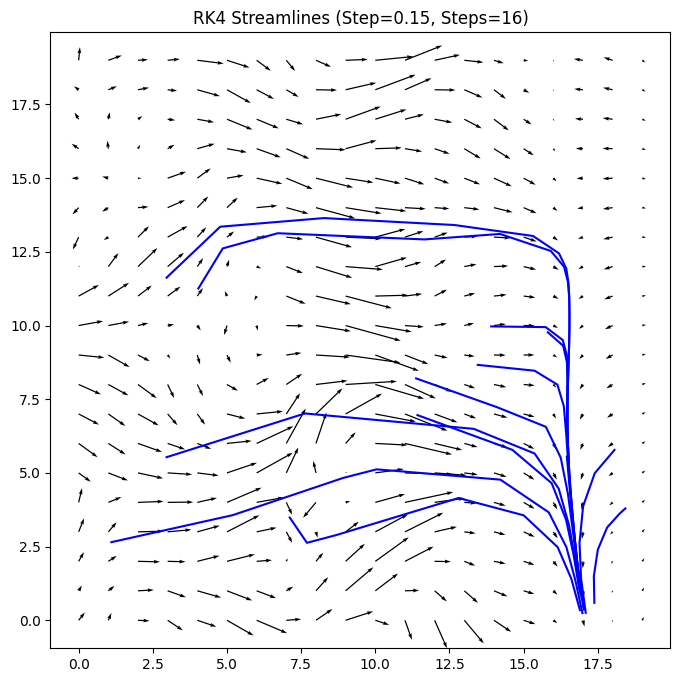

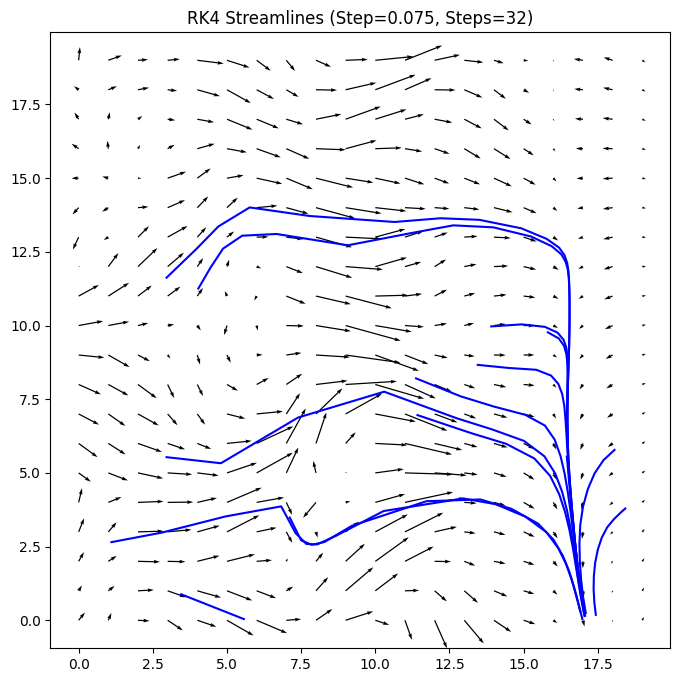

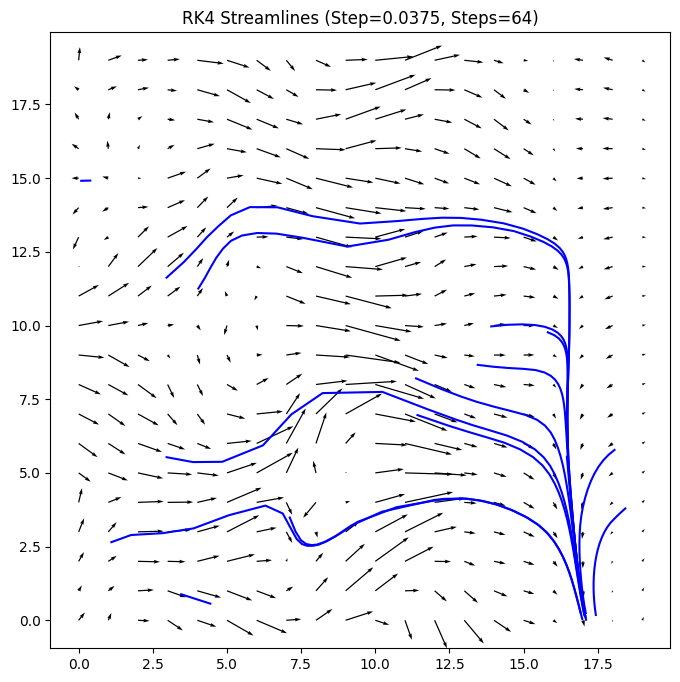

In [ ]:
def runge_kutta4(seed, step_size, num_steps, vecs):
    path = [seed]
    x, y = seed

    for _ in range(num_steps):
        k1 = bilinear_interpolation(x, y, vecs)
        k2 = bilinear_interpolation(x + 0.5 * step_size * k1[0], y + 0.5 * step_size * k1[1], vecs)
        k3 = bilinear_interpolation(x + 0.5 * step_size * k2[0], y + 0.5 * step_size * k2[1], vecs)
        k4 = bilinear_interpolation(x + step_size * k3[0], y + step_size * k3[1], vecs)
        dx = (step_size / 6) * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
        dy = (step_size / 6) * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
        x, y = x + dx, y + dy

        if x < 0 or x > 19 or y < 0 or y > 19:
            break
        path.append((x, y))
    return np.array(path)

for step_size, num_steps in zip(step_sizes, num_steps_list):
    plt.figure(figsize=(8, 8))
    plt.quiver(xx, yy, vecs[:, :, 0], vecs[:, :, 1], color="black", width=0.002)

    for seed in seed_points:
        streamline = runge_kutta4(seed, step_size, num_steps, vecs)
        plt.plot(streamline[:, 0], streamline[:, 1], color="blue")

    plt.title(f"RK4 Streamlines (Step={step_size}, Steps={num_steps})")
    plt.show()
